### ANALYZING THE INDIAN START-UP ECOSYSTEM

#### Project Description
This project involves analyzing the funding received by startups in India from 2018 to 2021.
Leveraging the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, We will identify key trends, sectoral and geographical distribution of funding,investor dynamics, and existing challenges within the ecosystem. The ultimate goal is to  proposing the best course of action to investors and foster a more robust and sustainable startup environment in India.
The datasets provided contain details of the startups,geographical location, the funding amounts recieved,investor information.

#### Objectives
1. Identify key investment trends in the Indian startup ecosystem from 2018 to 2021
2. Explore the distribution of startup funding across different sectors and regions in India.
3. Determine high-growth sectors that attract significant funding.
4. Analyze investor activity and preferences within the ecosystem.
5. Understand the characteristics of startups that receive substantial funding.


#### Hypothesis
Hypothesis  (Alternative Hypothesis): There is significant increase  in the amount of funding received by Indian start-ups from 2018 to 2021.
Null Hypothesis: There is no significant increase in the amount of funding received by Indian startups from 2018 to 2021.




#### Analytical Questions
1.	What are the trends in the total amount of funding received by Indian startups from 2018 to 2021?
2.	Which sectors have attracted the most investment during each year, and how have these trends evolved over the four years?
3.	Who are the highest investors, Total Fund invested and sector? 
4.	At which stage are Indian-Start-ups funded the most?
5. How is startup funding distributed across different sectors and regions. Highest and lowest?

#### Data Understanding
##### Loading datasets from different sources

In [289]:
#import all necessary libraries
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np
import warnings 

warnings.filterwarnings('ignore')

In [290]:
#load 2018 data 
data_18 = pd.read_csv('startup_funding2018.csv')

#View data
data_18.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


- some details in the amount column were given in INR(rupees) and need to be converted to dolar.The commas in the column also need to be stripped.
- location column nee to be cleaned and the commas stripped 

In [291]:
#load 2019 data 
data_19 = pd.read_csv('startup_funding2019.csv',encoding = "ISO-8859-1")

#View data
data_19.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


- the amount column ,location need to be cleaned and the commas stripped.

In [292]:
# Load environment variables from .env file into a dictionary to access 2020 and 2021 datasets from database
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
login = environment_variables.get("login")
password = environment_variables.get("password")

In [293]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={login};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [294]:
# Use the connect method of the pyodbc library and pass in the connection string.
connection = pyodbc.connect(connection_string)

In [295]:
# write an sql query to get data

query = '''SELECT *
           FROM INFORMATION_SCHEMA.TABLES
           WHERE TABLE_TYPE = 'BASE TABLE'
        '''
data = pd.read_sql(query, connection)
data.head()

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,LP1_startup_funding2021,BASE TABLE
1,dapDB,dbo,LP1_startup_funding2020,BASE TABLE


In [296]:
#write an sql query to extract 2020 details from the data
query = '''SELECT *
           FROM LP1_startup_funding2020
        '''
data_20 = pd.read_sql(query, connection)
data_20.head(4)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None


In [297]:
#write an sql query to extract 2021 details from the database
query = '''SELECT *

           FROM LP1_startup_funding2021
        '''
data_21 = pd.read_sql(query, connection)
data_21.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


-amount column needs to be cleaned, dollar sign removed and commas removed.

column names and description:

Company/Brand: Name of the company/start-up

Founded: Year start-up was founded

Sector: Sector of service

What it does: Description about Company

Founders: Founders of the Company

Investor: Investors

Amount($): Raised fund from grants

Stage: funding stage 

##### Data description/EDA

In [298]:
# a look at the shape of the dataframes
data_18.shape , data_19.shape , data_20.shape , data_21.shape

((526, 6), (89, 9), (1055, 10), (1209, 9))

In [299]:
# a quick overview of the datatypes for 2018 dataset
print(data_18.info(), "\n============= Null Values =============================")

#check for null values
print(data_18.isna().sum(), "\n============= Duplicate rows =============================")

#check for duplicates
print(data_18[data_18.duplicated()])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB
None 
============= Null Values =============================
Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64 
============= Duplicate rows =============================
        Company Name                                           Industry  \
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   

    Round/Series  Amount                     Location  \
348         Seed  250000  Bangalore, Karnataka, India 

In [300]:
#check the datatypes in 2019 dataset
print(data_19.info(), "\n============= Null Values =============================")

#check for null values
print(data_19.isna().sum(), "\n============= Duplicate rows =============================")
#check for duplicates
print(data_19.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB
None 
============= Null Values =============================
Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64 
============= Duplicate rows =============================
0


In [301]:
#overview of 2020 datatypes
print(data_20.info(), "\n============= Null Values =============================")

#check for null values
print(data_20.isna().sum(), "\n============= Duplicate rows =============================")

#check for duplicates
print(f" total number of duplicates for 2020 is {data_20.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB
None 
============= Null Values =============================
Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64 
============= Du

In [302]:
#Overview of 2021 datatype
print(data_21.info(), "\n============= Null Values =============================")

#check for null values
print(data_21.isna().sum(), "\n============= Duplicate rows =============================")

#check for duplicates
print(f"total number of duplicate rows for 2021 dataset is {data_21.duplicated().sum()}")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB
None 
============= Null Values =============================
Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64 
============= Duplicate rows =============================
total number of duplicate rows fo

Observations:
1. 2020 and 2021 datasets have different column names in comparison to 2018 and 2019 datasets.This has to be renamed for uniformity before merging the datasets.
2. The 2018 dataset exhibits some missing columns, contributing to an incomplete representation of the data.
3. The 2020 dataset contains an additional column that appears to be extraneous and does not serve a meaningful purpose in our analysis and will be removed
4. 2018 dataset has 1 duplicate row, 2020 has 3 duplicate rows and 2021 has 19 duplicate rows.
5. We can also see the total number of missing values in each column of our dataset, These will be handled in the data cleaning phase.



we have a total of 4 datasets from different sources and need to be merged before we can perform data cleaning and analysis.

In [303]:
#add a column for the year funding was recieved for each dataframe before merging.
data_21['year_funded']= '2021'
data_20['year_funded']= '2020'
data_19['year_funded']= '2019'
data_18['year_funded']= '2018'

In [304]:
#rename column names for each dataframe for uniformity before merging

data_18.rename(columns = {'Company Name':'company_name','Round/Series':'funding_stage','About Company': 'about_company','Industry':'industry','Amount':'Amount_in_usd'},inplace = True)
data_19.rename(columns = {'Company/Brand':'company_name','HeadQuarter':'Location','Sector':'industry','What it does' :'about_company','Amount($)':'Amount_in_usd','Stage': 'funding_stage'},inplace = True)
data_20.rename(columns = {'Company_Brand':'company_name','HeadQuarter':'Location','Sector':'industry','What_it_does' :'about_company','Amount':'Amount_in_usd','Stage': 'funding_stage'},inplace = True)
data_21.rename(columns = {'Company_Brand':'company_name','HeadQuarter':'Location','Sector':'industry','What_it_does' :'about_company','Amount':'Amount_in_usd','Stage': 'funding_stage'},inplace = True)

#preview the data
data_18.head(5)

,company_name,industry,funding_stage,Amount_in_usd,Location,about_company,year_funded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [305]:
# merge all dataframes

merged_df = pd.concat([data_18,data_19,data_20,data_21], axis = 0)

#view the merged dataframe
merged_df.tail(5)


,company_name,industry,funding_stage,Amount_in_usd,Location,about_company,year_funded,Founded,Founders,Investor,column10
1204,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2021,2019.0,"Chirag Mittal, Anirudh Syal",Endiya Partners,NaN
1205,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2021,2015.0,Bala Sarda,IIFL AMC,NaN
1206,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2021,2019.0,"Arnav Kumar, Vaibhav Singh",Owl Ventures,NaN
1207,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2021,2015.0,Ruchir Arora,"Winter Capital, ETS, Man Capital",NaN
1208,WeRize,Financial Services,Series A,$8000000,Bangalore,India’s first socially distributed full stack ...,2021,2019.0,"Vishal Chopra, Himanshu Gupta","3one4 Capital, Kalaari Capital",NaN


In [306]:
#view the datatype
merged_df.info()
print(f'============Number of unique values===============')
merged_df.nunique()

<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_name   2879 non-null   object 
 1   industry       2861 non-null   object 
 2   funding_stage  1941 non-null   object 
 3   Amount_in_usd  2622 non-null   object 
 4   Location       2765 non-null   object 
 5   about_company  2879 non-null   object 
 6   year_funded    2879 non-null   object 
 7   Founded        2110 non-null   float64
 8   Founders       2334 non-null   object 
 9   Investor       2253 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), object(10)
memory usage: 269.9+ KB
============Number of unique values===============


company_name     2214
industry          873
funding_stage      75
Amount_in_usd     803
Location          172
about_company    2691
year_funded         4
Founded            34
Founders         1980
Investor         1777
column10            2
dtype: int64

In [307]:

#convert the year column to date format
merged_df['year_funded'] = pd.to_datetime(merged_df['year_funded'],format='%Y').dt.year

#convert the Founded column to date format
merged_df['Founded'] = pd.to_datetime(merged_df['Founded'],format='%Y').dt.year

#view the result
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 1208
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_name   2879 non-null   object 
 1   industry       2861 non-null   object 
 2   funding_stage  1941 non-null   object 
 3   Amount_in_usd  2622 non-null   object 
 4   Location       2765 non-null   object 
 5   about_company  2879 non-null   object 
 6   year_funded    2879 non-null   int32  
 7   Founded        2110 non-null   float64
 8   Founders       2334 non-null   object 
 9   Investor       2253 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), int32(1), object(9)
memory usage: 258.7+ KB


In [308]:
merged_df.describe(include = 'all')

,company_name,industry,funding_stage,Amount_in_usd,Location,about_company,year_funded,Founded,Founders,Investor,column10
count,2879,2861,1941,2622,2765,2879,2879.000000,2110.000000,2334,2253,2
unique,2214,873,75,803,172,2691,NaN,NaN,1980,1777,2
top,BharatPe,FinTech,Seed,—,Bangalore,BYJU'S is an educational technology company th...,NaN,NaN,Byju Raveendran,Inflection Point Ventures,Pre-Seed
freq,10,173,606,148,764,5,NaN,NaN,7,36,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,2020.023619,2016.079621,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.086974,4.368006,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,1963.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,2015.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,2019.000000,NaN,NaN,NaN


The descriptive statistics above has a lot of NaN and duplicate values due to the nature of our dataset which has to be cleaned before we can perform the analysis.

### Data Cleaning

In [309]:
#drop redundant column 10
merged_df.drop(columns='column10',axis=1,inplace=True)

#check for duplicates
merged_df[merged_df.duplicated()]

#drop the duplicates
merged_df.drop_duplicates(keep='first',inplace =True)



In [310]:
merged_df.duplicated().sum()

#reset the index
merged_df.reset_index(inplace=True)

In [311]:
#preview the merged data
merged_df.head(5)

,index,company_name,industry,funding_stage,Amount_in_usd,Location,about_company,year_funded,Founded,Founders,Investor
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018,NaN,NaN,NaN
3,3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018,NaN,NaN,NaN
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018,NaN,NaN,NaN


In [312]:
#check for percentage of null values 
merged_df.isna().mean() * 100

index             0.000000
company_name      0.000000
industry          0.630252
funding_stage    32.528011
Amount_in_usd     8.963585
Location          3.991597
about_company     0.000000
year_funded       0.000000
Founded          26.890756
Founders         19.047619
Investor         21.848739
dtype: float64

#### Cleaning the amount column 
- We consider the base value for the amount column to be dollars so any value in the amount column with no sign will be treated as a dollar value.
- according to https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html, the average exchange rate for INR/USD in 2018 is ₹1 INR = $ 0.0146
- we will strip the currency symbols, convert ruppes to dollar, remove the commas,- and convert datatype to float.
-Certain rows in the amount column have wrong inputs which are values of other columns(like funding_stage and investor columns) and these rows must also be corrected.

- undisclosed values will be treated as NaN 

In [313]:
#view the unique values in the Amount cloumn
merged_df['Amount_in_usd'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

In [314]:
merged_df['funding_stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       None, 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pr

In [315]:

# initialize a list with all words in the amount column
mist = ['None','Upsparks','Series C', 'Seed','ah! Ventures','Pre-series A', 'ITO Angel Network, LetsVenture','JITO Angel Network, LetsVenture']
#get the index of the list 
mist_index = merged_df.index[merged_df['Amount_in_usd'].isin(mist)]
#initialize a list of figures in funding_stage column
stage_values = ['$1200000','$300000','$6000000','$1000000']
#get the index of the list
stage_index = merged_df.index[merged_df['funding_stage'].isin(stage_values)]
#view entries in wrong columns which is the sum of the mist_index and stage_index
merged_df.loc[[1764, 1903, 1904, 2185, 2192, 2198, 2321,2324, 2795]]

#correct entries in the wrong columns by creating a list
corrections ={
        1764: {'Amount_in_usd':'$1200000','Investor':'Upsparks','Location':'undisclosed','Founders':'Pritesh Kumar, Bharat Gupta','funding_stage':'undisclosed'},
        1903: {'Amount_in_usd':'$22000000','Investor':'Morgan Stanley Private Equity Asia',
              'Location':'None','Founders':'Varun Khanna','industry':'Pharmaceuticals',
              'funding_stage':'Series C','about_company':'Development and Manufacturing'},
        1904: {'Amount_in_usd':'$5000000','Investor':'Anshuman Maheshwary, Dr Srihari Raju Kalidindi','Founders':'Vikash Mishra, Mragank Jain',
              'industry':'None','funding_stage':'Seed',
              'about_company':"MoEVing is India's only Electric Mobility focu.."},
        2185: {'Amount_in_usd':'$300000','Investor':'ah! Ventures','Founders':'Vishal Gupta',
              'funding_stage':'None','about_company':'Holistic Development Programs for children in Soft Skills that make Smart Leaders'},
        2192: {'Amount_in_usd':'$1000000','funding_stage':'Pre-series A','Investor':'None'},
        2198: {'Amount_in_usd':'$300000','Investor':'JITO Angel Network, LetsVenture','Founders':'Omkar Pandharkame, Ketaki Ogale',
             'funding_stage':'None'},
       2321: {'Amount_in_usd':'$6000000','funding_stage':'None'},
       2324: {'Amount_in_usd':'$1000000','Investor':'JITO Angel Network, LetsVenture','funding_stage':'None'},
       2795:{'Amount_in_usd':'1000000','funding_stage':'Seed','Investor':'None'}
}

# Loop through each index and update the values
for index, new_values in corrections.items():
    for column, value in new_values.items():
        if column in merged_df.columns:
            merged_df.at[index, column] = value



# Preview rows with amount vales showing $Undisclosed, $undisclosed, and Undisclosed
undisclosed_list = ['$Undisclosed', '$undisclosed', 'Undisclosed']

# Get the index for all rows with undisclosed
undisclosed_index = merged_df.index[merged_df['Amount_in_usd'].isin(undisclosed_list)]

# Replace undisclosed values with NA
merged_df.loc[undisclosed_index, ['Amount_in_usd']] = merged_df.loc[undisclosed_index, ['Amount_in_usd']].replace(undisclosed_list, np.nan)




def clean_amount(amount):
    """
    Cleans the 'Amount_in_usd' column by removing unwanted symbols and converting to float.
    If the amount is in rupees (₹), it converts to USD.
    """
    if isinstance(amount, str):
        # Remove unwanted symbols
        clean_amount = amount.replace('$', '').replace('₹', '').replace(',', '').replace('-', 'np.nan')
        # Convert to float
        try:
            clean_amount = float(clean_amount)
        except ValueError:
            return np.nan
        # Convert rupees to USD if applicable
        if '₹' in amount:
            clean_amount *= 0.0146
        return clean_amount
    elif isinstance(amount, (int, float)):
        return float(amount)
    else:
        return np.nan

merged_df['Amount_in_usd'] = merged_df['Amount_in_usd'].apply(clean_amount)

merged_df['Amount_in_usd']



0         250000.0
1         584000.0
2         949000.0
3        2000000.0
4              NaN
           ...    
2851     3000000.0
2852    20000000.0
2853    55000000.0
2854    26000000.0
2855     8000000.0
Name: Amount_in_usd, Length: 2856, dtype: float64

In [316]:
# check for missing values
merged_df['Amount_in_usd'].isna().sum()

#the null values include undisclosed amount, we will fill the median considering outliers and skewness

merged_df['Amount_in_usd'].fillna(merged_df['Amount_in_usd'].median(), inplace=True)

merged_df['Amount_in_usd'].isna().sum()

0

#### Cleaning the location column
- wrong entries from other columns found in location and has to be corrected.

In [317]:
#check unique values in the location column
merged_df.Location.unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [318]:
#wrong entries from other columns found in location and has to be corrected.
# initialize a list with all wrong entries  in the locattion column
wrong_loc = ['Food & Beverages','Online Media\t#REF!', 'Information Technology & Services']
#get the index of the list 
wrong_loc_index = merged_df.index[merged_df['Location'].isin(wrong_loc)]
#view entries in wrong columns and correct them
merged_df.loc[[1902, 2747, 2823]]
#correct entries in the wrong columns by creating a list
correct_entries ={
                1902: {'industry':'Food & Beverages','Location':'Hauz Khas'},
                2747: {'industry':'Online Media','Location':'None',
                        'Founders':'CA Harvinderjit Singh Bhatia, Garima Surana, A',
                      'about_company':'Sochcast is an Audio experiences company that ...',
                       'Investor':'Vinners, Raj Nayak, Amritaanshu Agrawal'},
                2823: {'industry':'Information Technology & Services','Location':'Manchester, Greater Manchester'}
                }
# Loop through each index and update the values
for index, new_values in correct_entries.items():
    for column, value in new_values.items():
        if column in merged_df.columns:
            merged_df.at[index, column] = value


# # Split the location Column into City, State and Country
merged_df[["city", "state","country"]] = merged_df["Location"].str.split(",", n=2, expand=True)

merged_df["city"].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', nan,
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', None, 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 

#### cleaning the city column
#Azadpur is a locality located in Delhi city,Kalkaji is a localty in south delhi,Koramangala is a locality in Bangalore
#Kochi or Cochin or Ernakulam is part of the district of Ernakulam in the state of Kerala,
#Uttar pradesh is a state,Rajasthan is a state,Dhingsara is a village in Haryana state,Warangal is a district in Telangana state
#Odisha is a state,Bihar is a state,Hauz Khas is a neighborhood in South Delhi,Samastipur is a city in Bihar
#map santra to satara 

In [319]:
#remove \t#REF! from city column
merged_df['city'] = merged_df['city'].str.replace('\t#REF!','')

#define a function to correct city names wrongly spelt and mapped
def fix_city(cities):
    # Dictionary mapping incorrect city names to correct ones
    correct_city = {
        'Bengaluru': 'Bangalore',
        'Bangalore City': 'Bangalore',
        'Banglore': 'Bangalore',
        'Hyderebad': 'Hyderabad',
        'Gurgaon': 'Gurugram',
        'Thiruvananthapuram':'Trivandrum',
        'Kochi': 'Cochin',
        'Kormangala': 'Bangalore',
        'Ahmadabad': 'Ahmedabad',
        'Rajastan': 'Rajasthan',
        'Telugana': 'Telangana',
        'Orissia': 'Odisha',
        'Samsitpur': 'Samastipur',
        'San Franciscao': 'San Francisco',
        'San Francisco Bay Area': 'San Francisco',
        'Kalkaji': 'Delhi',
        'Azadpur': 'Delhi',
        'New Delhi': 'Delhi',
        'Bangaldesh': 'Bangladesh',
        'Santra':'Satara',
        'Warangal': 'Warangal',
        'Hauz Khas': 'Delhi',
        'Small Towns': 'unknown',
        'undisclosed': 'unknown'
    }
    return correct_city.get(cities, cities)

#apply correction to city column
merged_df['city'] = merged_df['city'].apply(fix_city)

#correct entries in city column where state is found at different rows
state_in_city = ['Uttar pradesh', 'Rajasthan','Odisha', 'Bihar','Telangana','Goa','Kerala','Tamil Nadu','Haryana','Gujarat','Punjab','Karnataka','Madhya Pradesh','Andhra Pradesh','Chandigarh','Uttarakhand','Jharkhand','West Bengal','Dadra and Nagar Haveli and Daman and Diu']

state_index = merged_df.index[merged_df['city'].isin(state_in_city)]

#index positions of states found in city column
state_index = [84,  102,  142,  289,  417,  420,  426,  433,  469,  480,  492,  521,529,551,  557,607,613,  712,  
               716,  718,724,  740,  766,  787,923,  945,  960,  978, 1082, 1112,1207,1241,1307, 1315,1338, 1364,
               1370,1376, 1485, 1487, 1492, 1592,1602, 1639,1702, 1723, 1808,1839, 1981, 1989,1991, 2029, 2084,
               2087, 2097, 2315,2362, 2405,2491, 2501, 2556, 2603, 2721]

# Swap City and State values at the specified index positions
for idx in state_index:
    if idx < len(merged_df):
        merged_df.at[idx, 'state'], merged_df.at[idx, 'city'] = merged_df.at[idx, 'city'], np.nan

#countries in city column
country_in_city = ['India','Singapore','Bangladesh','France']

#locate the index positions of countries in city column
country_index = merged_df.index[merged_df['city'].isin(country_in_city)]

country_index = [12, 42, 59, 199, 705, 857, 886, 1011, 1069, 1094]

# Swap City and country values at the specified index positions
for idx in country_index:
    if idx < len(merged_df):
        merged_df.at[idx, 'country'], merged_df.at[idx, 'city'] = merged_df.at[idx, 'city'],np.nan
    
#change None to Nan and covert to string data type
merged_df['city'] = merged_df['city'].replace('None', 'unknown').astype('str')
merged_df['city'] = merged_df['city'].replace('nan','unknown')


In [320]:
#check for missing values
print(f" number of missing value is :{merged_df['city'].isna().sum()}")

# Display the cleaned city columns
merged_df['city'].unique()

 number of missing value is :0


array(['Bangalore', 'Mumbai', 'Gurugram', 'Noida', 'Hyderabad', 'Delhi',
       'unknown', 'Hubli', 'Chennai', 'Mohali', 'Kolkata', 'Pune',
       'Jodhpur', 'Kanpur', 'Ahmedabad', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Uttar Pradesh', 'Andheri',
       'Mylapore', 'Ghaziabad', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal',
       'Coimbatore', 'Worli', 'Alleppey', 'Guindy', 'Lucknow', 'Surat',
       'Tirunelveli', 'None', 'Frisco', 'California', 'Dhingsara',
       'New York', 'Patna', 'San Francisco', 'San Ramon', 'Paris',
       'Plano', 'Sydney', 'London', 'Milano', 'Palmwoods', 'Samastipur',
       'Irvine', 'Tumkur', 'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing',
       'Ludhiana', 'Dehradun', 'Tangerang', 'Berlin', 'Seattle', 'Riyadh',
       'Seoul', 'Bangkok', 'Warangal', 'Rajsamand', 'Ranchi', 'Vadodara',
       'Nagpur', 'Silvassa', 'Roorkee', 'Ambernath', 'Panchkula',


cleaning the state column

In [321]:
#view the state column unique values
merged_df['state'].unique()


array([' Karnataka', ' Maharashtra', ' Haryana', ' Uttar Pradesh',
       ' Andhra Pradesh', ' Delhi', ' Asia', ' Tamil Nadu', ' Punjab',
       ' West Bengal', ' Rajasthan', ' Gujarat', 'Haryana', ' Kerala',
       ' Goa', ' Madhya Pradesh', ' India', ' Assam', 'Chandigarh', nan,
       None, 'Telangana', 'Uttar pradesh', 'Rajasthan', ' Tamilnadu',
       'Gujarat', 'Kerala', ' Rajastan', ' Texas', ' United States',
       ' California', ' Ile-de-France', ' Silicon Valley', ' England',
       ' New South Wales', ' Lombardia', ' Queensland', ' West Coast',
       ' Bihar', ' Newcastle upon Tyne', ' China', ' Zhejiang',
       ' Jawa Barat', 'Odisha', 'Bihar', 'Goa', 'Tamil Nadu',
       'West Bengal', ' CA', 'Jharkhand', ' Greater Manchester'],
      dtype=object)

In [322]:
#remove whitespaces and replace None wih Nan
merged_df['state'] = merged_df['state'].str.strip().replace('None', 'unknown')

# Define a mapping of incorrect to correct state names
def fix_state(states):
    state_mapping = {'Uttar pradesh': 'Uttar Pradesh',
                    'Tamilnadu': 'Tamil Nadu',
                    'Rajastan': 'Rajasthan', 
                   'Ile-de-France': 'Île-de-France', 
                   'Lombardia': 'Lombardy',
                  'CA': 'California'}
    return state_mapping.get(states, states)

# Correct the state names
merged_df['state'] = merged_df['state'].apply(fix_state)


#countries in state column
country_in_state = ['India','United States','China']

#locate the index positions of countries in state column
countries_index = merged_df.index[merged_df['state'].isin(country_in_state)]

countries_index = [240, 799, 837, 876, 915]

# Swap state and country values at the specified index positions
for idx in countries_index:
    if idx < len(merged_df):
        merged_df.at[idx, 'country'], merged_df.at[idx, 'state'] = merged_df.at[idx, 'state'],np.nan
    
#change None to Nan and covert to string data type
merged_df['state'] = merged_df['state'].replace('None', 'unknown').astype('str')


# Display the cleaned DataFrame
merged_df['state'].unique() 

array(['Karnataka', 'Maharashtra', 'Haryana', 'Uttar Pradesh',
       'Andhra Pradesh', 'Delhi', 'Asia', 'Tamil Nadu', 'Punjab',
       'West Bengal', 'Rajasthan', 'Gujarat', 'Kerala', 'Goa',
       'Madhya Pradesh', 'nan', 'Assam', 'Chandigarh', 'None',
       'Telangana', 'Texas', 'California', 'Île-de-France',
       'Silicon Valley', 'England', 'New South Wales', 'Lombardy',
       'Queensland', 'West Coast', 'Bihar', 'Newcastle upon Tyne',
       'Zhejiang', 'Jawa Barat', 'Odisha', 'Jharkhand',
       'Greater Manchester'], dtype=object)

In [323]:
# we will map cities to state and fill the na

# Dictionary to map cities to their respective states
city_to_state = {
    'Bangalore': 'Karnataka', 'Mumbai': 'Maharashtra', 'Gurugram': 'Haryana', 'Noida': 'Uttar Pradesh',
    'Hyderabad': 'Telangana', 'Delhi': 'Delhi', 'Hubli': 'Karnataka', 'Chennai': 'Tamil Nadu',
    'Mohali': 'Punjab', 'Kolkata': 'West Bengal', 'Pune': 'Maharashtra', 'Jodhpur': 'Rajasthan',
    'Kanpur': 'Uttar Pradesh', 'Ahmedabad': 'Gujarat', 'Cochin': 'Kerala', 'Faridabad': 'Haryana',
    'Jaipur': 'Rajasthan', 'Kota': 'Rajasthan', 'Anand': 'Gujarat', 'Belgaum': 'Karnataka',
    'Thane': 'Maharashtra', 'Margão': 'Goa', 'Indore': 'Madhya Pradesh', 'Alwar': 'Rajasthan',
    'Kannur': 'Kerala', 'Trivandrum': 'Kerala', 'Ernakulam': 'Kerala', 'Uttar Pradesh': 'Uttar Pradesh',
    'Andheri': 'Maharashtra', 'Mylapore': 'Tamil Nadu', 'Ghaziabad': 'Uttar Pradesh', 'Powai': 'Maharashtra',
    'Guntur': 'Andhra Pradesh', 'Kalpakkam': 'Tamil Nadu', 'Bhopal': 'Madhya Pradesh', 'Coimbatore': 'Tamil Nadu',
    'Worli': 'Maharashtra', 'Alleppey': 'Kerala', 'Guindy': 'Tamil Nadu', 'Lucknow': 'Uttar Pradesh',
    'Surat': 'Gujarat', 'Tirunelveli': 'Tamil Nadu', 'Warangal': 'Telangana', 'Rajsamand': 'Rajasthan',
    'Ranchi': 'Jharkhand', 'Vadodara': 'Gujarat', 'Nagpur': 'Maharashtra', 'Silvassa': 'Dadra and Nagar Haveli and Daman and Diu',
    'Roorkee': 'Uttarakhand', 'Ambernath': 'Maharashtra', 'Panchkula': 'Haryana', 'Mangalore': 'Karnataka',
    'Bhubaneswar': 'Odisha', 'Kottayam': 'Kerala', 'Panaji': 'Goa', 'Satara': 'Maharashtra',
    'Bhilwara': 'Rajasthan', 'Guwahati': 'Assam', 'The Nilgiris': 'Tamil Nadu', 'Gandhinagar': 'Gujarat',
    'Patna': 'Bihar', 'Samastipur': 'Bihar', 'Tumkur': 'Karnataka'
}

# # Map the cities to their respective states
merged_df['state'] = merged_df['city'].map(city_to_state)

# # # Replace 'nan' and 'None' values in the City column with np.nan
# merged_df['city'].replace(['nan', 'None', 'unknown'], np.nan, inplace=True)

# Replace np.nan in the State column with the mapped state from the City column
merged_df['state'].fillna(merged_df['city'].map(city_to_state),inplace = True)

# Replace 'nan' values in the State column with unknown
merged_df['state'].str.replace( np.nan,'unknown')

# Display the DataFrame

merged_df['state'].unique()



array(['Karnataka', 'Maharashtra', 'Haryana', 'Uttar Pradesh',
       'Telangana', 'Delhi', nan, 'Tamil Nadu', 'Punjab', 'West Bengal',
       'Rajasthan', 'Gujarat', 'Kerala', 'Goa', 'Madhya Pradesh',
       'Andhra Pradesh', 'Bihar', 'Jharkhand',
       'Dadra and Nagar Haveli and Daman and Diu', 'Uttarakhand',
       'Odisha', 'Assam'], dtype=object)

In [324]:
merged_df['state'].fillna('unknown', inplace = True)
merged_df['state'].isna().sum()
merged_df['state'].unique()

array(['Karnataka', 'Maharashtra', 'Haryana', 'Uttar Pradesh',
       'Telangana', 'Delhi', 'unknown', 'Tamil Nadu', 'Punjab',
       'West Bengal', 'Rajasthan', 'Gujarat', 'Kerala', 'Goa',
       'Madhya Pradesh', 'Andhra Pradesh', 'Bihar', 'Jharkhand',
       'Dadra and Nagar Haveli and Daman and Diu', 'Uttarakhand',
       'Odisha', 'Assam'], dtype=object)

In [325]:
#cleaning the country column

merged_df['country'].unique() 

array([' India', 'India', nan, None, 'Singapore', ' United States',
       'United States', ' France', ' West Coast', 'Bangladesh',
       ' United Kingdom', ' Australia', ' Italy', 'France', ' Western US',
       'China', ' China', ' Indonesia'], dtype=object)

In [326]:
#remove whitespaces
merged_df['country'] = merged_df['country'].str.strip()
# Dictionary to map states to their respective countries
state_to_country = {
    'Karnataka': 'India', 'Maharashtra': 'India', 'Haryana': 'India', 'Uttar Pradesh': 'India',
    'Telangana': 'India', 'Delhi': 'India', 'Tamil Nadu': 'India', 'Punjab': 'India',
    'West Bengal': 'India', 'Rajasthan': 'India', 'Gujarat': 'India', 'Kerala': 'India',
    'Goa': 'India', 'Madhya Pradesh': 'India', 'Andhra Pradesh': 'India', 'Bihar': 'India',
    'Jharkhand': 'India', 'Dadra and Nagar Haveli and Daman and Diu': 'India', 'Uttarakhand': 'India',
    'Odisha': 'India', 'Assam': 'India', 'Unknown': 'Unknown'
}

# Map the states to their respective countries
merged_df['country'] = merged_df['country'].fillna(merged_df['state'].map(state_to_country))
# # Map the states to their respective countries
# df['Country'] = df['Country'].fillna(df['State'].map(state_to_country))

# Display the DataFrame
merged_df['country'].unique()


array(['India', nan, 'Singapore', 'United States', 'France', 'West Coast',
       'Bangladesh', 'United Kingdom', 'Australia', 'Italy', 'Western US',
       'China', 'Indonesia'], dtype=object)

In [327]:
#fill the missing values
merged_df['country'].fillna('unknown', inplace = True)
merged_df['country'].isna().sum()

0

In [328]:
#drop the location column
merged_df.drop(columns='Location',inplace = True)

#### Cleaning the Industry Column
From research, there are 15 sectors in India where all these values in the sector column of the dataset can be generalised into. They are therefore mapped onto the 15 sectors which include:

IT & Technology
Financial Services
Healthcare & Life Sciences
Consumer Goods
Business Services
Media & Entertainment
Education
Manufacturing
Retail
Transportation & Logistics
Sports
Agriculture
Real Estate
Travel & Tourism
Energy
Others
source: https://www.businessinsider.in/business/startups/news/top-10-industries-for-new-startups-in-india-as-per-hurun-list/articleshow/105651758.cms

In [329]:
#check the unique values in location and inconsistencies
merged_df['industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [330]:
merged_df['industry'] = merged_df['industry'].str.lower()
merged_df['industry'].value_counts()

industry
fintech                                               257
edtech                                                215
financial services                                     75
e-commerce                                             75
healthcare                                             67
                                                     ... 
health insurance, insurance, life insurance             1
rental, taxi service, travel                            1
e-commerce, e-commerce platforms, internet, retail      1
financial services, professional services               1
staffing & recruiting                                   1
Name: count, Length: 832, dtype: int64

In [331]:
# Get the first sentence of every list
merged_df['industry']=merged_df['industry'].str.split(",").str[0].str.replace("'", '', regex=True).astype('str')
merged_df['industry'].unique() 


array(['brand marketing', 'agriculture', 'credit', 'financial services',
       'e-commerce platforms', 'cloud infrastructure', 'internet',
       'market research', 'information services', 'mobile payments',
       'b2b', 'apps', 'food delivery', 'industrial automation',
       'automotive', 'finance', 'accounting', 'artificial intelligence',
       'internet of things', 'air transportation', 'food and beverage',
       'autonomous vehicles', 'enterprise software', 'logistics',
       'insurance', 'information technology', 'blockchain', 'education',
       'e-commerce', 'renewable energy', 'e-learning', 'clean energy',
       'transportation', 'fitness', 'hospitality',
       'media and entertainment', 'broadcasting', 'edtech', 'health care',
       '—', 'sports', 'big data', 'cloud computing', 'food processing',
       'trading platform', 'consumer goods', 'wellness', 'fashion',
       'consulting', 'biotechnology', 'communities', 'consumer',
       'consumer applications', 'mobile',

In [332]:
import re

# Mapping the industries to sectors using regular expression
def map_sector(industry):
    if re.search(r'\b(3D Printing|Analytics|.*Tech.*|Android|Apps|Artificial Intelligence|Battery|Big Data|Blockchain|CleanTech|Cloud Computing|Cloud Infrastructure|Collaboration|Communities|Computer|Consumer Applications|Embedded Systems|Enterprise Resource Planning \(ERP\)|Enterprise Software|File Sharing|Information Services|Information Technology|Internet|Internet of Things|iot|Mobile|Nanotechnology|Renewable Energy|Search Engine|Smart Cities|Software)\b', industry, re.IGNORECASE):
        return 'IT & Technology'
    elif re.search(r'\b(Accounting|B2B|Business Development|Business Intelligence|Business Travel|Career Planning|Consulting|Creative Agency|Crowdsourcing|Customer Service|Environmental Consulting|Facilities Support Services|Government|Human Resources|Market Research)\b', industry, re.IGNORECASE):
        return 'Business Services'
    elif re.search(r'\b(Advertising|Audio|Brand Marketing|Broadcasting|Classifieds|Digital Entertainment|Digital Marketing|Digital Media|Gaming|Marketing|Media and Entertainment|Music|Music Streaming|News|Online Games|Online Portals|Reading Apps|Social Media)\b', industry, re.IGNORECASE):
        return 'Media & Entertainment'   
    elif re.search(r'\b(Aerospace|Automotive|Autonomous Vehicles|Industrial|Industrial Automation|Packaging Services)\b', industry, re.IGNORECASE):
        return 'Manufacturing'
    elif re.search(r'\b(AgTech|Agriculture|Farming|fishery|food production)\b', industry, re.IGNORECASE):
        return 'Agriculture'
    elif re.search(r'\b(Air Transportation|Delivery|Delivery Service|Electric Vehicle|Last Mile Transportation|Logistics|Transportation|Transportation)\b', industry, re.IGNORECASE):
        return 'Transportation & Logistics'
    elif re.search(r'\b(Hel.*|Hea.*|Hosp.*|Vet.*|Pharma.*|Alternative Medicine|Biopharma|Biotechnology|Dental|Dietary Supplements|Child Care|Health Care|Health Diagnostics|Hospital|Medical|Medical Device|Veterinary|Wellness|Healthcare)\b', industry, re.IGNORECASE):
        return 'Healthcare & Life Sciences'
    elif re.search(r'\b(Fin.*|Banking|Consumer Lending|Credit|Credit Cards|Crowdfunding|nft marketplace|Crypto>*|FinTech|Finance|Financial Services|Fraud Detection|Funding Platform|Health Insurance|Insurance|Mobile Payments|Trading Platform|Wealth Management)\b', industry, re.IGNORECASE):
        return 'Financial Services'
    elif re.search(r'\b(Basketball|Fantasy Sports|Fitness|Sports|eSports)\b', industry, re.IGNORECASE):
        return 'Sports'
    elif re.search(r'\b(Beauty|Children|Consumer|Consumer Electronics|foootwear|Cooking|Cosmetics|Eyewear|Fashion|Food Processing|Food and Beverage|Home Decor)\b', industry, re.IGNORECASE):
        return  'Consumer Goods'
    elif re.search(r'\b(Catering|.*travel.*|Events|Hospitality|Tourism|Travel|Wedding)\b', industry, re.IGNORECASE):
        return 'Travel & Tourism' 
    elif re.search(r'\b(E-Commerce|E-Commerce Platforms|Marketplace|Retail|.*commerce.*|)\b', industry, re.IGNORECASE):
        return 'Retail and E-commerce' 
    elif re.search(r'\b(Continuing Education|.*Edu.*|learn|academy|Professional Training & Coaching|tutor|stem|Higher Educatio|E-Learning|EdTech|edttech|Preschool Daycare|school|Education|edutech|Teaching|Training)\b', industry, re.IGNORECASE):
        return 'Education'
    elif re.search(r'\b(Commercial|Commercial Real Estate|Rental||Housing Marketplace|Furniture Rental|Real estate|Housing|Rental|Furniture|Rental space|Proptech)\b', industry, re.IGNORECASE):
        return 'Real Estate'
    elif re.search(r'\b(Clean Energy|.*nergy.*|EV|Solar.*|Ev startup|Electricity|Wl & rac protection)\b', industry, re.IGNORECASE):
        return 'Energy'
    else:
        return 'Others'
    
# # Apply the function to the Industry column
merged_df['industry'] = merged_df['industry'].apply(map_sector)

# # Display the DataFrame to verify the changes
merged_df['industry'].value_counts() 

industry
IT & Technology               1076
Retail and E-commerce          867
Healthcare & Life Sciences     195
Financial Services             166
Consumer Goods                 128
Media & Entertainment           97
Transportation & Logistics      83
Manufacturing                   76
Business Services               70
Sports                          34
Others                          30
Agriculture                     19
Travel & Tourism                15
Name: count, dtype: int64

In [333]:
# filter only the rows with the "Others" industry
others_ind = merged_df[merged_df["industry"] == "Others" ]
others_ind.head(5)


,index,company_name,industry,funding_stage,Amount_in_usd,about_company,year_funded,Founded,Founders,Investor,city,state,country
58,58,MissMalini Entertainment,Others,Seed,1518400.0,MissMalini Entertainment is a multi-platform n...,2018,NaN,NaN,NaN,Mumbai,Maharashtra,India
105,105,Jagaran Microfin,Others,Debt Financing,8030000.0,Jagaran Microfin is a Microfinance institution...,2018,NaN,NaN,NaN,Kolkata,West Bengal,India
121,121,FLEECA,Others,Seed,3000000.0,FLEECA is a Tyre Care Provider company.,2018,NaN,NaN,NaN,Jaipur,Rajasthan,India
146,146,WheelsEMI,Others,Series B,14000000.0,"WheelsEMI is the brand name of NBFC, WheelsEMI...",2018,NaN,NaN,NaN,Pune,Maharashtra,India
153,153,Fric Bergen,Others,Venture - Series Unknown,3000000.0,Fric Bergen is a leader in the specialty food ...,2018,NaN,NaN,NaN,Alwar,Rajasthan,India


In [334]:
# view the descriptions of the companies with the others categories
others_ind["about_company"]

58     MissMalini Entertainment is a multi-platform n...
105    Jagaran Microfin is a Microfinance institution...
121              FLEECA is a Tyre Care Provider company.
146    WheelsEMI is the brand name of NBFC, WheelsEMI...
153    Fric Bergen is a leader in the specialty food ...
174    Deftouch is a mobile game development company ...
181    Corefactors is a leading campaign management, ...
210    Cell Propulsion is an electric mobility startu...
230                      FInd your Customized Home here.
235    dishq leverages food science and machine learn...
238    Trell is a location based network which helps ...
242          New Apartments, Flats for Sale in Bangalore
243    It is a fabless semiconductor company focused ...
247    SaffronStays connects travellers to India's In...
251    Inner Being Wellness manufactures beauty, well...
257    SEO, PPC, Search Engine Marketing, Social Medi...
258                             Digital Marketing Agency
259    Scale Labs is a cross bo

In [335]:
# create dictionary to contain the keywords in the what_it_does column
keywords = {
    'entertainment': 'Media & Entertainment',
    'microfinance': 'Financial Services',
    'tyre care': 'Consumer Goods',
    'nbfc': 'Financial Services',
    'specialty food': 'Consumer Goods',
    'mobile game development': 'IT & Technology',
    'campaign management': 'Business Services',
    'electric mobility startup': 'Transportation & Logistics',
    'food science': 'Consumer Goods',
    'machine learning': 'IT & Technology',
    'location based network': 'IT & Technology',
    'real estate': 'Real Estate',
    'semiconductor company': 'IT & Technology',
    'travellers accommodation': 'Travel & Tourism',
    'beauty, wellness': 'Consumer Goods',
    'search engine marketing': 'IT & Technology',
    'digital marketing agency': 'Business Services',
    'cross border e-commerce solutions': 'Business Services',
    'wealth management platform': 'Financial Services',
    'micro-event & contextual marketing': 'Business Services',
    'partners with small and medium businesses': 'Financial Services',
    'celebrate and reward': 'Financial Services',
    'post-harvest management': 'Business Services',
    'cyber security': 'IT & Technology',
    'cosmetics brand': 'Consumer Goods',
    'activity discovery & booking platform': 'Travel & Tourism',
    'edutech': 'Education'
}

# Function to assign sector based on description
def assign_sector(about_company):
    for keyword,industry in keywords.items():
        if keyword in about_company.lower():
            return industry
    return "Others" #Keep Others if no keyword matches

# Update sectors for entries currently labeled as "Others"
merged_df.loc[merged_df['industry'] == 'Others', 'industry'] = merged_df.loc[merged_df['industry'] == 'Others', 'about_company'].apply(assign_sector)
merged_df['industry'].value_counts()

industry
IT & Technology               1081
Retail and E-commerce          867
Healthcare & Life Sciences     195
Financial Services             171
Consumer Goods                 133
Media & Entertainment           98
Transportation & Logistics      84
Manufacturing                   76
Business Services               74
Sports                          34
Agriculture                     19
Travel & Tourism                16
Others                           7
Education                        1
Name: count, dtype: int64

In [336]:
#check for missing values
merged_df['industry'].isna().sum()


0

#### Cleaning the funding_stage cplumn

link: https://www.startupindia.gov.in/content/sih/en/funding.html


stage of Funding	    Stage mapping
- Ideation:	           Pre-Seed funding
- Validation:	           Mid series, Seed Round & Series A, Seed funding
- Early Traction:	       Series A
- Scaling:	Series B, Series C, Series D, Series E, Series F, Series G, Series H, Series I
- Exit Option:	Post-IPO Debt, Post-IPO Equity, Secondary Market, Other | Private Equity, Corporate Round, Undisclosed, Non-equity Assistance, Debt, Bridge, Edge


In [337]:
# view unique values
merged_df['funding_stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       None, 'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C',
       'Pre-series B', 'Bridge', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Seed Round', 'Bridge Round', 'Pr

In [338]:
import pandas as pd
import numpy as np
import re                      

# Define the mapping using a list of dictionaries
def map_stage(funding_stage):
    if pd.isna(funding_stage) or funding_stage in ['Undisclosed', 'undisclosed', 'None', 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']:
        return 'Unknown'
    
    if re.search(r'\b(Bootstrapping|Self-funding)\b', funding_stage, re.IGNORECASE):
        return 'Ideation'
    elif re.search(r'\b(Pre-Seed|Angel|Grant|Non-equity Assistance|Early Seed)\b', funding_stage, re.IGNORECASE): 
        return 'Validation'
    elif re.search(r'\b(Seed|Seed Funding|Seed Fund|Seed Round|Seed Investment|Pre Series A|Pre-Seed Round|Pre Series A1)\b', funding_stage , re.IGNORECASE):
        return 'Early Traction'
    elif re.search(r'\b(Series [A-I]|Private Equity|Venture - Series Unknown|Corporate Round|Secondary Market|Fresh Funding|Post Series A|Series B\+|Pre-Series A1|Series A\+|Series B3|PE|Series F1|Series A2|Mid Series|Series C, D|Series E2|Series D1|Series F2|Series B2|Series A-1|Pre-Series B|Pre-Series C)\b', funding_stage, re.IGNORECASE):
        return 'Scaling'
    elif re.search(r'\b(Debt Financing|Post-IPO Debt|Post-IPO Equity|Bridge|Bridge Round|Debt|Funding Round|Edge)\b', funding_stage, re.IGNORECASE):
        return 'Exit Options'
    else:
        return 'Unknown'
    
# Apply the function to the 'funding_stage' column
merged_df['funding_stage'] = merged_df['funding_stage'].apply(lambda x: map_stage(x)).astype(str)

# Print the DataFrame to check the results
merged_df['funding_stage'].unique()


array(['Early Traction', 'Scaling', 'Validation', 'Exit Options',
       'Unknown'], dtype=object)

In [339]:
#check for missing values

merged_df['funding_stage'].isna().sum()

0

#### cleaning the investor column

In [340]:

merged_df['Investor'].unique()

array([nan, 'Sixth Sense Ventures', 'General Atlantic', ...,
       'Owl Ventures', 'Winter Capital, ETS, Man Capital',
       '3one4 Capital, Kalaari Capital'], dtype=object)

In [341]:
#### Cleaning the investor column

merged_df['Investor'].value_counts()



Investor
Inflection Point Ventures                                                35
Venture Catalysts                                                        32
Mumbai Angels Network                                                    17
Angel investors                                                          15
Undisclosed                                                              13
                                                                         ..
Bytedance, Falcon Edge, Goldman Sachs, Advent Management                  1
INSEAD Angels, IIT Kanpur Angels, Sixth Sense Ventures, Saahil Bhatia     1
Sukhbir Singh, Rakhee Singal                                              1
Angel Network                                                             1
3one4 Capital, Kalaari Capital                                            1
Name: count, Length: 1771, dtype: int64

In [342]:
merged_df['Investor']= merged_df['Investor'].str.split(',').str[0].str.replace("'","", regex=True)
merged_df['Investor'].value_counts()

Investor
Venture Catalysts            52
Inflection Point Ventures    42
Sequoia Capital India        25
Tiger Global                 24
Titan Capital                21
                             ..
Bharti Airtel                 1
IDG Ventures                  1
Angel Investors               1
Kalyan Krishnamurthy          1
Winter Capital                1
Name: count, Length: 1246, dtype: int64

In [343]:
merged_df['Investor'].isnull().sum()

624

In [344]:
# Replace all the Nulls with undisclosed
merged_df["Investor"].fillna("Undisclosed",inplace=True)

In [345]:
merged_df['Investor'].isnull().sum()

0

#### cleaning the founded column

We will be cleaning the missing values by fill backward fill method

We will also be converting the data type from float to datetime for purpose of our analysis.

In [346]:
merged_df['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008., 2020., 1998., 2007., 1982., 2009.,
       1995., 2006., 1978., 1999., 1994., 2005., 1973., 2002., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [347]:
#  Remove unwanted characters
merged_df['Founded'] = merged_df['Founded'].replace(['...', np.nan], np.NaN)

merged_df['Founded'].isna().sum()

768

In [348]:
# Fill the nulls
merged_df["Founded"].fillna(method ='bfill',inplace = True)

merged_df['Founded'].isna().sum()



0

#### Cleaning the company_name column

In [349]:
merged_df['company_name'].unique()

array(['TheCollegeFever', 'Happy Cow Dairy', 'MyLoanCare', ...,
       'Cogos Technologies', 'Vahdam', 'WeRize'], dtype=object)

In [350]:
merged_df['company_name'].isna().sum()

0

Cleaning the founders column

In [351]:
# Remove unwanted characters
merged_df['Founders'] = merged_df['Founders'].replace(['...', np.nan], np.NaN)

# Check the number of NaN values in the 'founders' column
merged_df['Founders'].isna().sum()


#fill the nulls with unknown
merged_df['Founders'].fillna('unknown', inplace = True)

merged_df['Founders'].isna().sum()

0

In [352]:
#save cleaned data to csv file
merged_df.to_csv('indian_ecosystem_merged_data.csv')

EXPLORATORY DATA ANALYSIS

In [353]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2856.0,4.982829e+02,3.334439e+02,0.0,210.0,453.5,774.25,1.208000e+03
Amount_in_usd,2856.0,9.849275e+07,3.097961e+09,876.0,1000000.0,3000000.0,8000000.00,1.500000e+11
year_funded,2856.0,2.020018e+03,1.087759e+00,2018.0,2020.0,2020.0,2021.00,2.021000e+03
Founded,2856.0,2.015596e+03,3.963923e+00,1963.0,2014.0,2016.0,2018.00,2.021000e+03


The 'Amount_in_usd' column shows a high degree of variability with significant outliers, as indicated by the large standard deviation and the maximum value.
The 'year_funded' column shows that most funding happened around the years 2020 and 2021, with minimal variation.
The 'Founded' column indicates that most companies were founded in recent years, with a few outliers going back several decades.
The presence of NaN values in the 'Founded' column means some founding year data is missing.

In [354]:
merged_df.isna().sum()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2856 non-null   int64  
 1   company_name   2856 non-null   object 
 2   industry       2856 non-null   object 
 3   funding_stage  2856 non-null   object 
 4   Amount_in_usd  2856 non-null   float64
 5   about_company  2856 non-null   object 
 6   year_funded    2856 non-null   int32  
 7   Founded        2856 non-null   float64
 8   Founders       2856 non-null   object 
 9   Investor       2856 non-null   object 
 10  city           2856 non-null   object 
 11  state          2856 non-null   object 
 12  country        2856 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(9)
memory usage: 279.0+ KB


#### Hypothesis Testing
Null Hypothesis(Ho): There is no significant difference in the amount of funding received by Indian startups from 2018 to 2021.
Alternative Hypothesis(Ha): There is significant difference  in the amount of funding received by Indian start-ups from 2018 to 2021.


In [355]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#define threshhold
threshold = 0.05

anova_results = {}
significant_factors = []

# List of categorical columns
categorical_cols = ['industry', 'funding_stage', 'state', 'year_funded', 'Founded', 'Founders', 'Investor', 'city']

for col in categorical_cols:
    model = ols(f'Amount_in_usd ~ C({col})', data = merged_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    anova_results[col] = anova_table
    
    # Check if the p-value is below the threshold of 0.05
    if anova_table["PR(>F)"][0] < 0.05:
        significant_factors.append(col)

# Display the ANOVA results
for col, result in anova_results.items():
    print(f"ANOVA results for {col}:\n", result, "\n")

# Display significant factors
print("Significant factors (p < 0.05):", significant_factors)

# Interpret the results
p_value = anova_table['PR(>F)'][0]
if p_value < threshold:
    print("Reject the null hypothesis: There is a significant difference in the average funding amounts across different sectors.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the  funding amounts across the years.")



ANOVA results for industry:
                    sum_sq      df         F    PR(>F)
C(industry)  9.054148e+18    13.0  0.072263  0.999997
Residual     2.739142e+22  2842.0       NaN       NaN 

ANOVA results for funding_stage:
                         sum_sq      df         F    PR(>F)
C(funding_stage)  2.931525e+20     4.0  7.708045  0.000004
Residual          2.710732e+22  2851.0       NaN       NaN 

ANOVA results for state:
                 sum_sq      df         F    PR(>F)
C(state)  6.425916e+19    21.0  0.317232  0.998696
Residual  2.733621e+22  2834.0       NaN       NaN 

ANOVA results for year_funded:
                       sum_sq      df         F    PR(>F)
C(year_funded)  7.592413e+18     3.0  0.263494  0.851735
Residual        2.739288e+22  2852.0       NaN       NaN 

ANOVA results for Founded:
                   sum_sq      df        F    PR(>F)
C(Founded)  5.545234e+20    33.0  1.76638  0.004568
Residual    2.684595e+22  2822.0      NaN       NaN 

ANOVA results for Foun

Analytical Questions
1.	What are the trends in the total amount of funding received by Indian startups from 2018 to 2021?
2.	Which sectors have attracted the most investment during each year, and how have these trends evolved over the four years?
3.	Who are the highest investors, Total Fund invested and sector? 
4.	At which stage are Indian-Start-ups funded the most?
5. How is startup funding distributed across different cities  and states. Highest and lowest?

### Visualizing the data

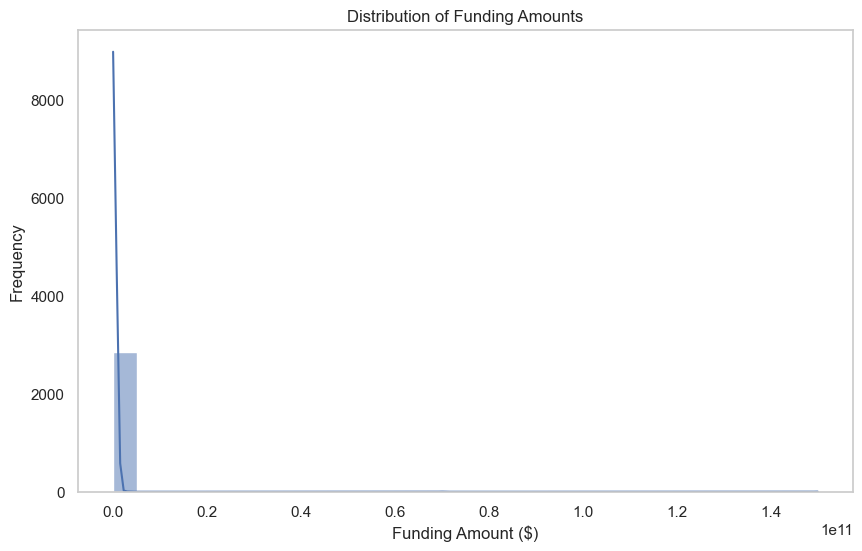

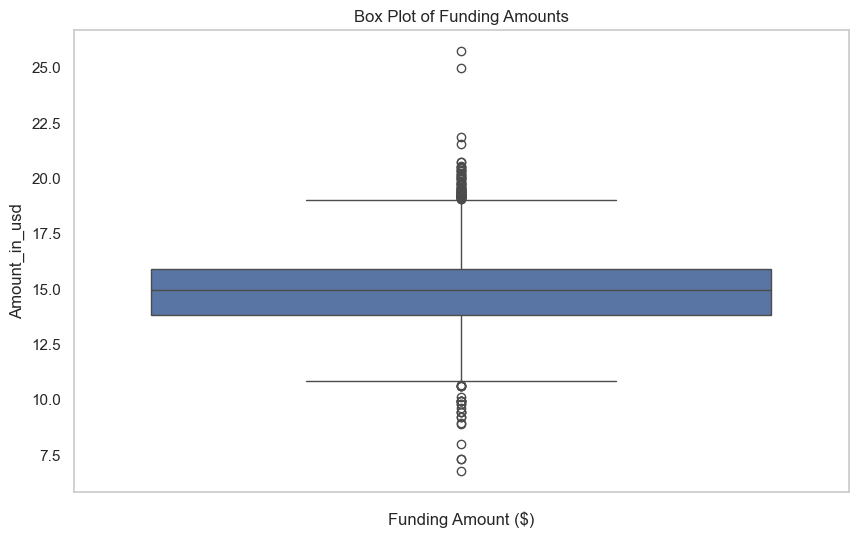

In [356]:
import matplotlib.pyplot as plt
import seaborn as sns

# look at amount distribution

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Amount_in_usd'], bins=30, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount ($)')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


#boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=np.log1p(merged_df['Amount_in_usd']))
plt.title('Box Plot of Funding Amounts')
plt.xlabel('Funding Amount ($)')
plt.grid(False)
plt.show()


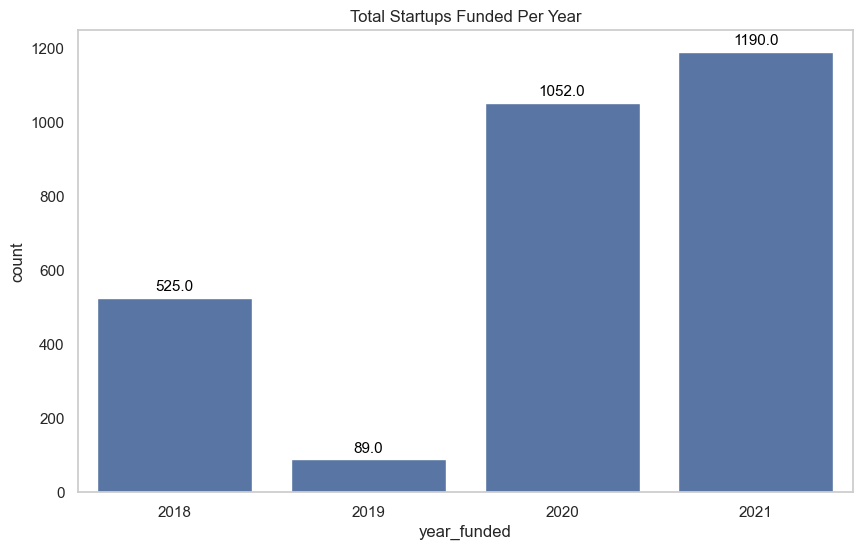

In [357]:
# Total number of startup funded in each  Year
Total_Startups_Funded = merged_df['year_funded'].value_counts().sort_index()

# Plot a bar chart to show the number of startups funded each year
plt.figure(figsize=(10, 6))

# Use seaborn's countplot to create the bar plot
ax = sns.countplot(x='year_funded', data=merged_df, color='b')

# Annotate each bar with the height value (number of funded startups)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=11, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add title and remove grid
plt.title('Total Startups Funded Per Year')
plt.grid(False)

# Show the plot
plt.show()


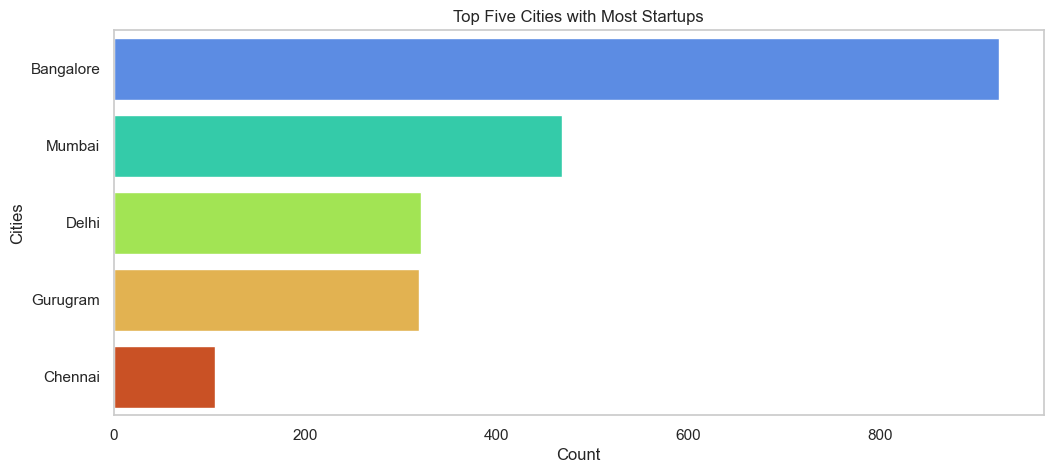

In [358]:
# count the number of startups in each city
top_ten_city = merged_df['city'].value_counts().head(5)

# plot a horizontal bar chart to show the number of startups in each city
plt.figure(figsize=(12, 5))
sns.barplot(x=top_ten_city.values, y=top_ten_city.index,palette='turbo')
plt.title('Top Five Cities with Most Startups')
plt.xlabel('Count')
plt.ylabel('Cities')
plt.grid(False)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


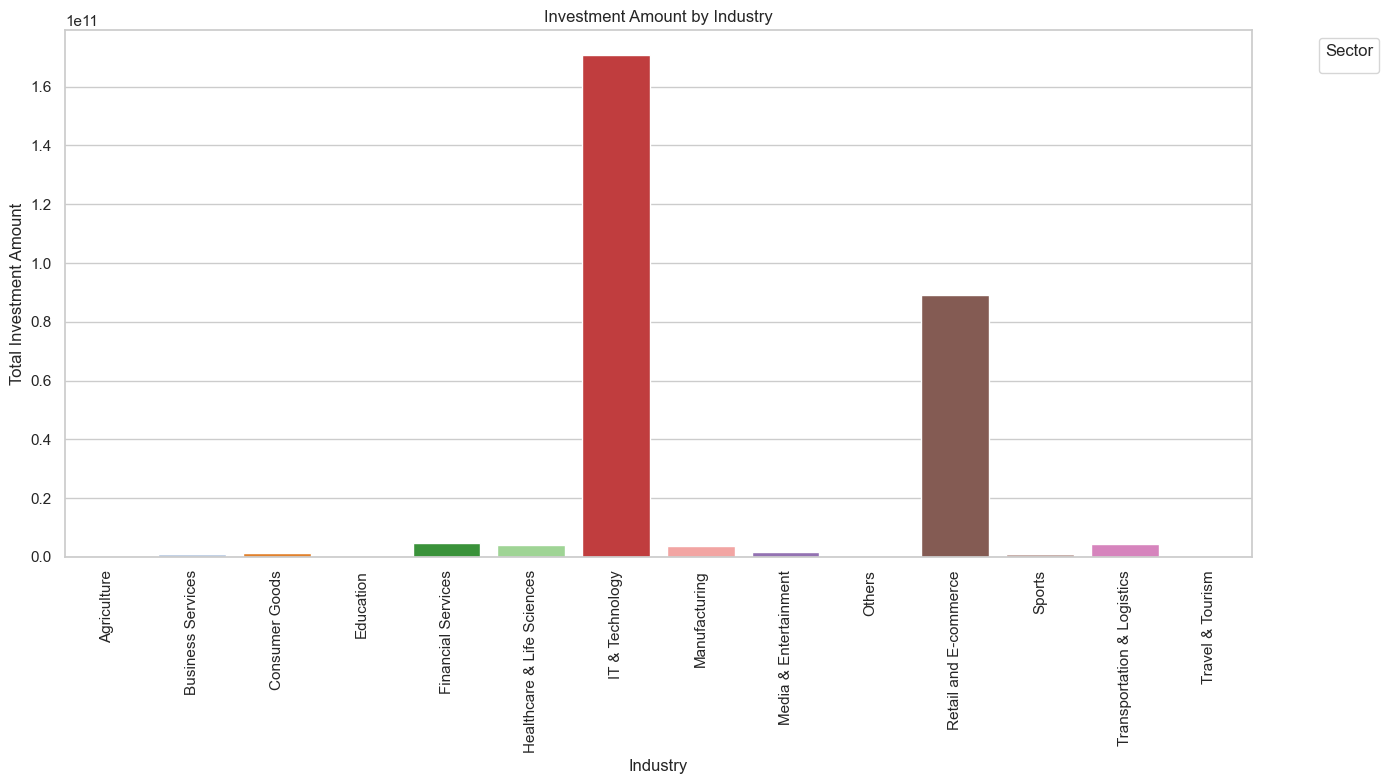

In [359]:
#Funding by sector
# Group the data
df_grouped = merged_df.groupby('industry')['Amount_in_usd'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(data=df_grouped, x='industry', y='Amount_in_usd', palette='tab20')
plt.title('Investment Amount by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Investment Amount')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

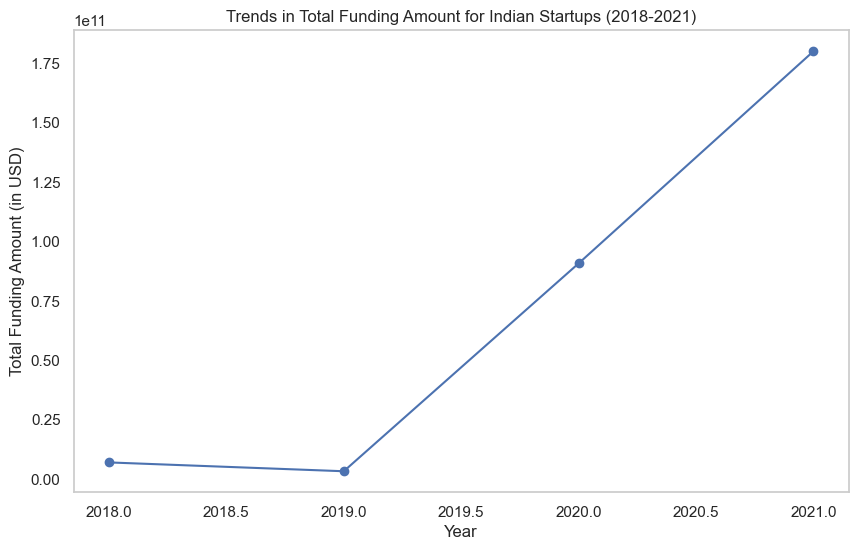

In [360]:
#1.	What are the trends in the total amount of funding received by Indian startups from 2018 to 2021?

# Aggregate the total funding amount for each year
funding_trends = merged_df.groupby('year_funded')['Amount_in_usd'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(funding_trends['year_funded'], funding_trends['Amount_in_usd'], marker='o', linestyle='-', color='b')
plt.title('Trends in Total Funding Amount for Indian Startups (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in USD)')
plt.grid(False)
plt.show()


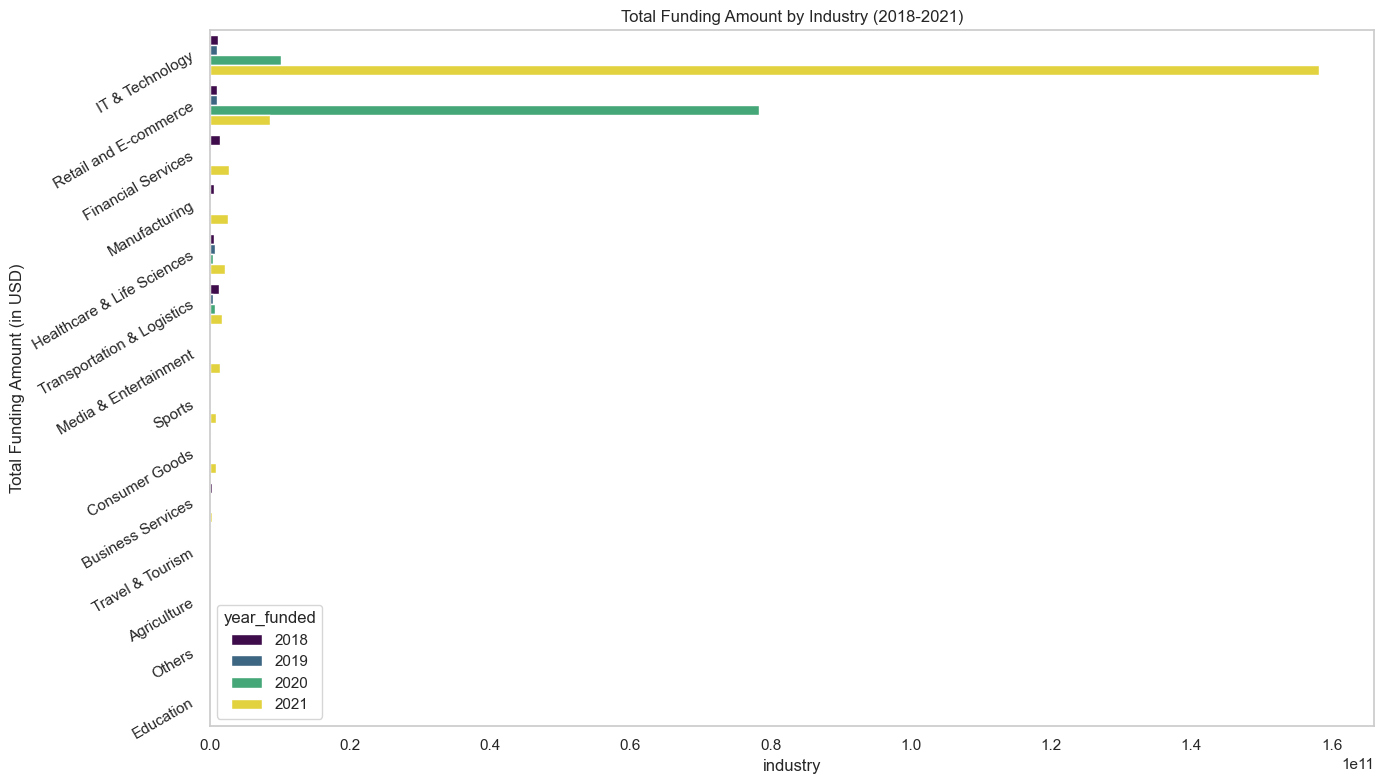

In [361]:
# 2)Which sectors have attracted the most investment during each year, and how have these trends evolved over the four years?
#Which sectors (e.g., fintech, healthtech, edtech) have seen the highest growth in the number of startups and funding amounts?
# Aggregate the total funding amount for each industry per year
funding_trends = merged_df.groupby(['year_funded','industry'])['Amount_in_usd'].sum().reset_index()

# Sort the DataFrame by the sum of 'amount' in descending order
funding_trends_sort = funding_trends.sort_values(by= 'Amount_in_usd', ascending= False)

# Plot the data using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create a bar plot to show the total funding for each industry per year
sns.barplot(y='industry', x='Amount_in_usd', data=funding_trends_sort,hue='year_funded', ci=None, palette='viridis')

# Customize the plot
plt.title('Total Funding Amount by Industry (2018-2021)')
plt.xlabel('industry')
plt.ylabel('Total Funding Amount (in USD)')
plt.grid(False)

# Show the plot
plt.yticks(rotation =30)
plt.tight_layout()
plt.show()


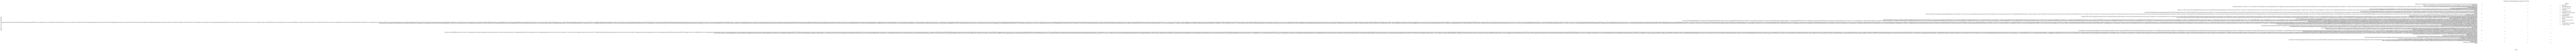

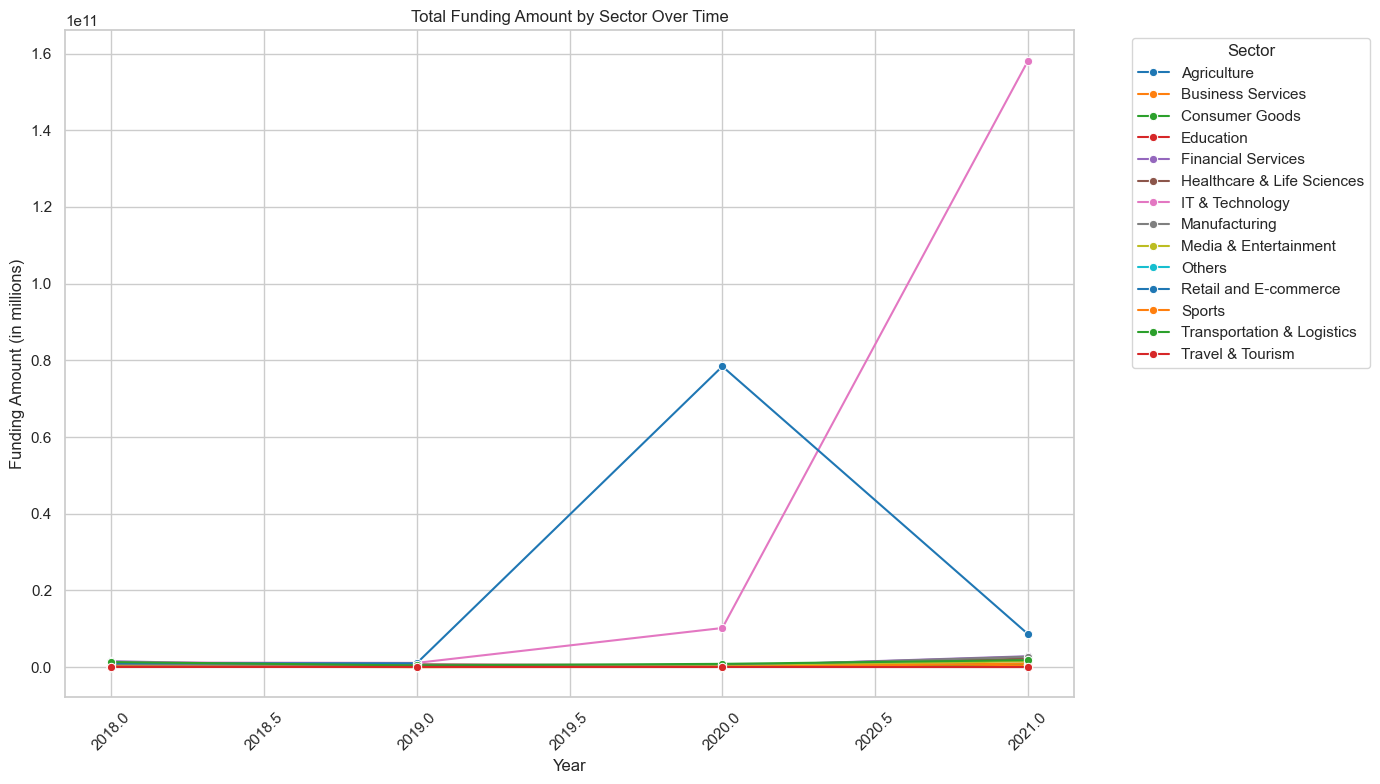

In [362]:
# 2)Which sectors have attracted the most investment during each year, and how have these trends evolved over the four years?

# Aggregate the data by sector and year to get the total number of startups and total funding amount
funding_by_sector = merged_df.groupby(['industry', 'year_funded']).agg({'company_name': 'sum', 'Amount_in_usd': 'sum'}).reset_index()

# Create the plot for the number of funded startups by sector
plt.figure(figsize=(14, 8))
sns.lineplot(x='year_funded', y='company_name', hue='industry', data=funding_by_sector, marker='o', palette='tab10')
plt.title('Number of Funded Startups by Sector Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Funded Startups')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create the plot for the total funding amount by sector
plt.figure(figsize=(14, 8))
sns.lineplot(x='year_funded', y='Amount_in_usd', hue='industry', data=funding_by_sector, marker='o', palette='tab10')
plt.title('Total Funding Amount by Sector Over Time')
plt.xlabel('Year')
plt.ylabel('Funding Amount (in millions)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


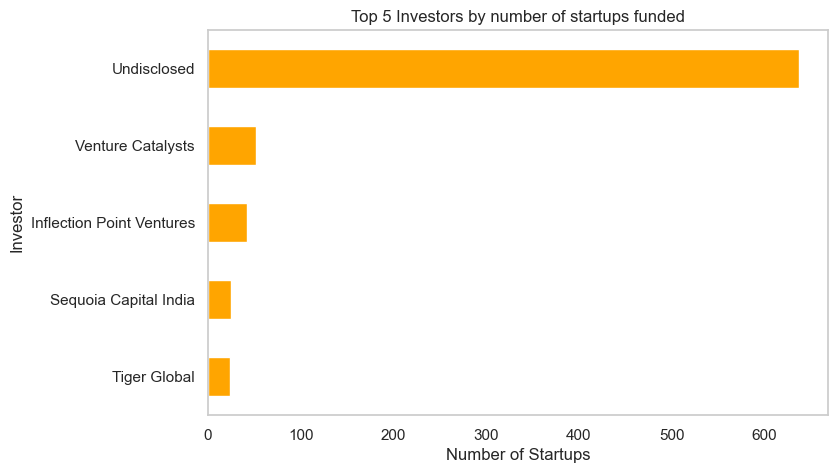

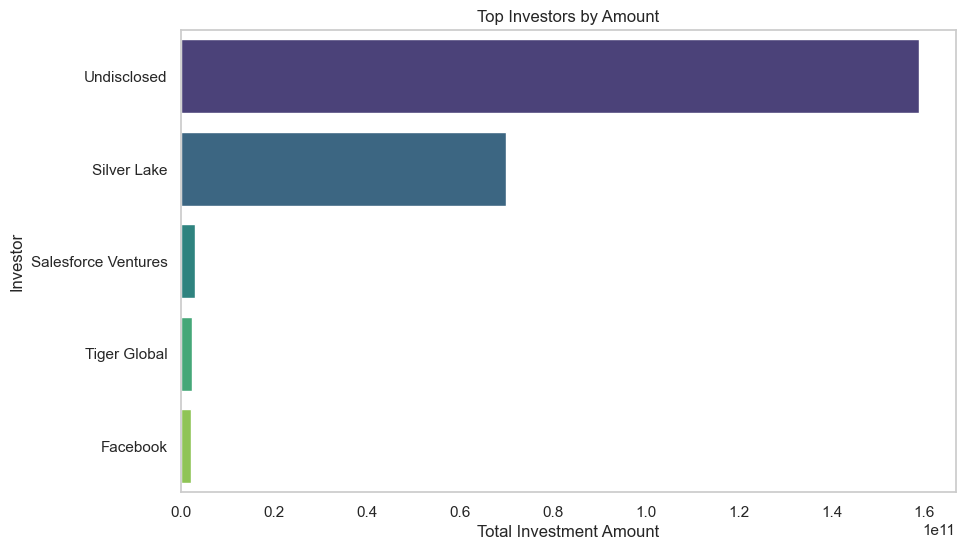

In [363]:
# 3) Who are the highest investors, Total Fund invested and sector? 

Top_5_investors_ = merged_df['Investor'].value_counts().head(5)

# plot a bar chart to show the top 5 investors with the most number of startups
plt.figure(figsize=(8, 5))
Top_5_investors_.sort_values().plot(kind='barh', color='orange')
plt.title('Top 5 Investors by number of startups funded')
plt.xlabel('Number of Startups')
plt.ylabel('Investor')
plt.grid(False)
plt.show()



#top investors by amount funded
df_groupedinv = merged_df.groupby('Investor')['Amount_in_usd'].sum().reset_index()

# Sort by total funding amount in descending order
df_top_investors = df_groupedinv.sort_values(by='Amount_in_usd', ascending=False).head(5)  

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_investors, x='Amount_in_usd', y='Investor', palette='viridis')
plt.title('Top Investors by Amount')
plt.xlabel('Total Investment Amount')
plt.ylabel('Investor')
plt.grid(False)
plt.show()





The analysis identifies Undisclosed investors,  Venture Catalysts and Inflection Point Ventures as top Investors within the Indian startup ecosystem. These key players have funded multiple startups across diverse sectors from 2018 to 2021. Their diverse investment portfolios reflect a strategic approach to spreading risk and capitalizing on opportunities across various sectors, contributing to the growth and innovation of the startup ecosystem

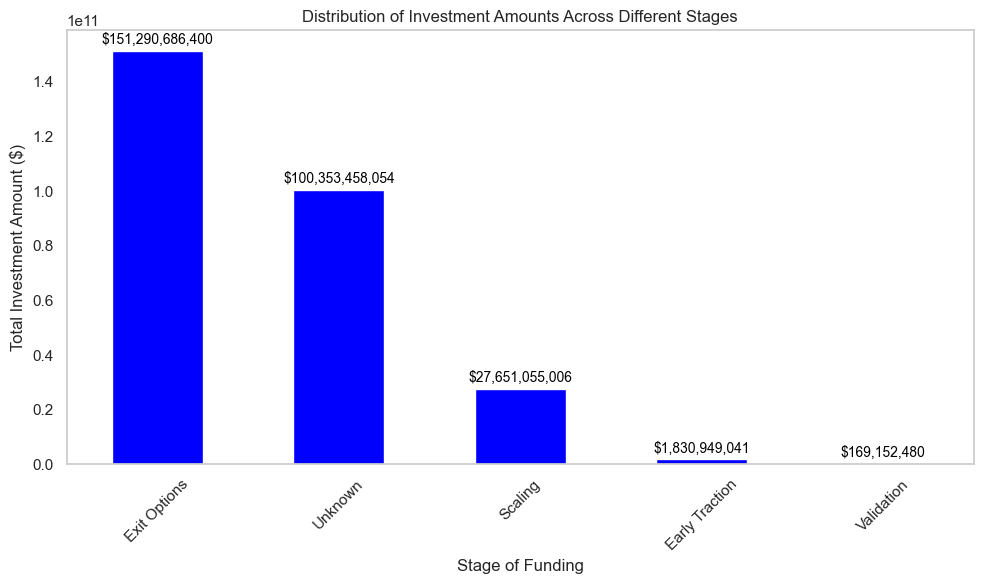

In [364]:
#4)At which stage are Indian-Start-ups funded the most?
# Group by funding stage and sum the investment amounts
stage_distribution = merged_df.groupby('funding_stage')['Amount_in_usd'].sum().sort_values(ascending=False)

# Plot the distribution
plt.figure(figsize=(10, 6))
ax = stage_distribution.plot(kind='bar', color='blue')

# Add title and labels
plt.title('Distribution of Investment Amounts Across Different Stages')
plt.xlabel('Stage of Funding')
plt.ylabel('Total Investment Amount ($)')
plt.xticks(rotation=45)

# Annotate each bar with the height value (total investment amount)
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', 
                fontsize=10, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Customize grid
plt.grid(False)
plt.tight_layout()
plt.show()


Highest funded city: Mumbai with $230,965,414,700.00
Lowest funded city: Kota with $1,460.00
Highest funded state: Maharashtra with $232,769,083,405.00
Lowest funded state: Jharkhand with $100,000.00


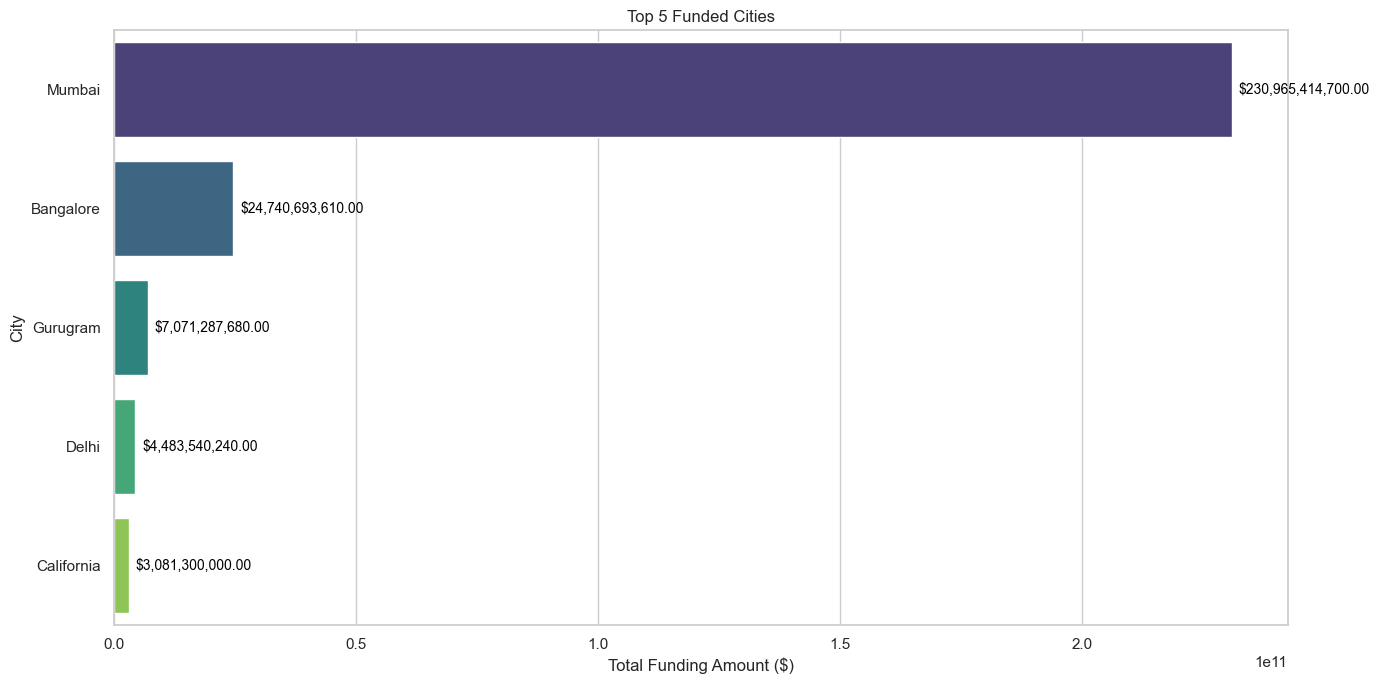

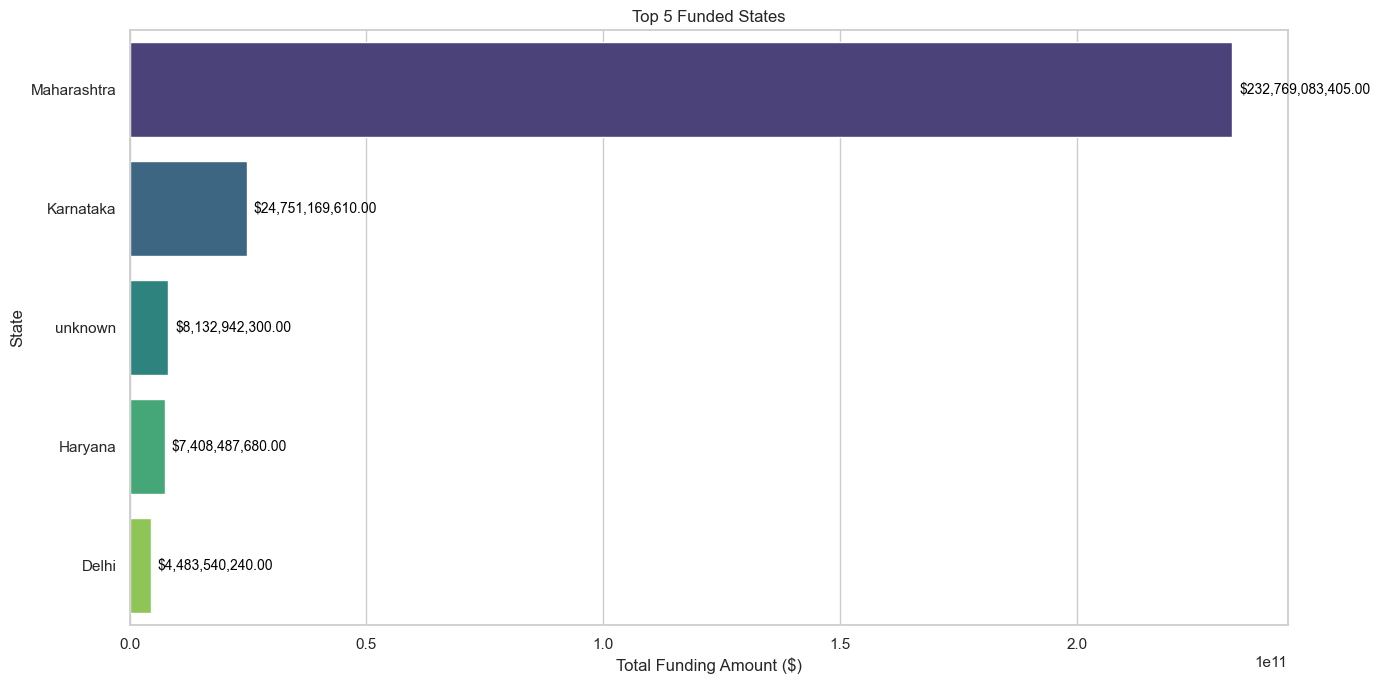

In [366]:
#5. How is startup funding distributed across different cities  and states. Highest and lowest?


# Group by city and sum the investment amounts
city_funding = merged_df.groupby('city')['Amount_in_usd'].sum().reset_index()

# Group by state and sum the investment amounts
state_funding = merged_df.groupby('state')['Amount_in_usd'].sum().reset_index()

# Find the cities and states with the highest and lowest funding
highest_funded_city = city_funding.loc[city_funding['Amount_in_usd'].idxmax()]
lowest_funded_city = city_funding.loc[city_funding['Amount_in_usd'].idxmin()]

highest_funded_state = state_funding.loc[state_funding['Amount_in_usd'].idxmax()]
lowest_funded_state = state_funding.loc[state_funding['Amount_in_usd'].idxmin()]

print(f"Highest funded city: {highest_funded_city['city']} with ${highest_funded_city['Amount_in_usd']:,.2f}")
print(f"Lowest funded city: {lowest_funded_city['city']} with ${lowest_funded_city['Amount_in_usd']:,.2f}")

print(f"Highest funded state: {highest_funded_state['state']} with ${highest_funded_state['Amount_in_usd']:,.2f}")
print(f"Lowest funded state: {lowest_funded_state['state']} with ${lowest_funded_state['Amount_in_usd']:,.2f}")


#visualizing

# Visualize the funding distribution across cities
plt.figure(figsize=(14, 7))
city_plot = sns.barplot(x='Amount_in_usd', y='city', data=city_funding.sort_values(by='Amount_in_usd', ascending=False).head(5), palette='viridis')
plt.title('Top 5 Funded Cities')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('City')

# Annotate each bar with the funding amount
for p in city_plot.patches:
    city_plot.annotate(f'${p.get_width():,.2f}', 
                       (p.get_width(), p.get_y() + p.get_height() / 2.), 
                       ha='left', va='center', 
                       fontsize=10, color='black', 
                       xytext=(5, 0), 
                       textcoords='offset points')

plt.tight_layout()
plt.show()

# Visualize the funding distribution across states
plt.figure(figsize=(14, 7))
state_plot = sns.barplot(x='Amount_in_usd', y='state', data=state_funding.sort_values(by='Amount_in_usd', ascending=False).head(5), palette='viridis')
plt.title('Top 5 Funded States')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('State')

# Annotate each bar with the funding amount
for p in state_plot.patches:
    state_plot.annotate(f'${p.get_width():,.2f}', 
                        (p.get_width(), p.get_y() + p.get_height() / 2.), 
                        ha='left', va='center', 
                        fontsize=10, color='black', 
                        xytext=(5, 0), 
                        textcoords='offset points')
plt.tight_layout()
plt.show()


#### Summary of findings
Total Startups and Funding:
- Total Startups Funded: 2,856
- Total Funding Received: $281 billion
- Average Funding per Startup: $98 million

Sector Analysis:
- Top 3 Sectors by Funding:
- IT and Tech: $171 billion
- Retail and E-commerce: $89 billion
- Financial Services: $5 billion

Funding Stage Analysis:
Exit Options received the highest funding with $151 billion, indicating a strong focus on liquidity events such as acquisitions and IPOs.

Geographic Analysis:
Top 3 Cities by Funding:
- Mumbai
- Bangalore
- Gurugram
- Delhi

#### Recommendations

Given the heavy concentration of funding in IT and Tech, as well as Retail and E-commerce, investors and policymakers should consider fostering growth in other promising sectors such as healthcare, education, and clean energy to create a more balanced startup ecosystem.

- Support for Financial Services Startups:
Despite being one of the top sectors, financial services received significantly less funding compared to IT and Tech and Retail and E-commerce. Initiatives to increase funding and support for fintech startups could stimulate growth in this critical sector.
- Promote Regional Development:
The funding is highly concentrated in major cities like Mumbai, Bangalore, Gurugram, and Delhi. Efforts should be made to promote startup activity in other regions by improving infrastructure, providing incentives, and creating startup hubs in tier-2 and tier-3 cities.
- Focus on Early-Stage Funding:
While Exit Options have attracted substantial funding, there should be an emphasis on increasing seed and early-stage funding to nurture new startups from inception to growth stages. This can be achieved through angel investors, government grants, and early-stage venture capital.

By implementing these recommendations, the Indian startup ecosystem can become more balanced, inclusive, and supportive of innovation across diverse sectors and regions. This will contribute to sustainable economic growth and increased global competitiveness.